# Linear Regression with Batch Gradient Descent

You will train your model using a real world dataset.  The dataset contains a collection of real estate listings in San Luis Obispo county.

The model predict the price given the square footage of the house.


In [ ]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt

# read dataset
df = pd.read_csv("housing_price_data.csv")

df.head()

,MPLS,Price,Bedrooms,Bathrooms,Size,PriceSq
0,132842,795000,3,3,2371,335.30
1,134364,399000,4,3,2818,141.59
2,135141,545000,4,3,3032,179.75
3,135712,909000,4,4,3540,256.78
4,136282,109900,3,1,1249,87.99


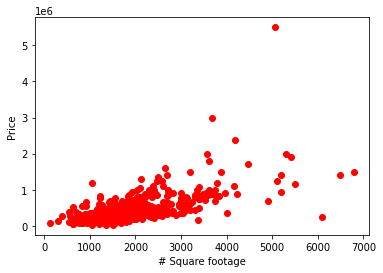

In [ ]:
# Plot data points
X, y = (df["Size"].values,df["Price"].values)
X = X.reshape(len(X),1)
y = y.reshape(len(y),1)

# plots the data points
plt.plot(X, y, 'ro')
plt.xlabel("# Square footage")
plt.ylabel("Price")
plt.show()

In [ ]:
# Normalize the house size, e.g., subtract min and divide by (max-min) to ensure 
# the scale is compatible with the bias, which is 1
max_min = X.max(0) - X.min(0)
Xmin = X.min(0)
X = (X-Xmin) / max_min

# Add bias
z=np.ones((len(X),1)) 
X = X.reshape(len(X),1)
X = np.concatenate((z,X), axis=1)                
y = y.reshape(len(X),1) 

# sort for testing/plotting
Xsort = np.sort(X, axis=0)

print(X.shape)
print(y.shape)

# For non-vectorized
X_train = X[:,1]
y_train = y

(781, 2)
(781, 1)


## Complete this code

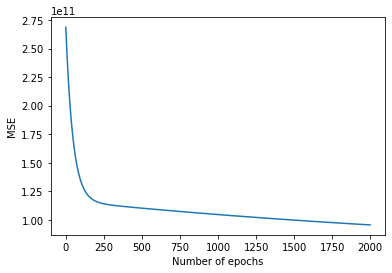

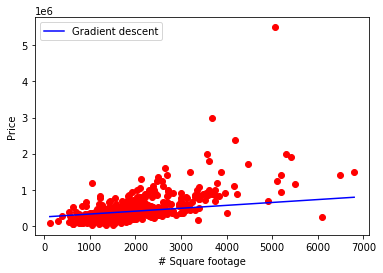

Predicted price of a 5000 square foot house: $ [648213.4346068]


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
# Initialize vector w 
np.random.seed(20)
w = np.random.rand(2,1)
w0 = w[0]
w1 = w[1]

# Learning rate
nu = 0.01

# Number of epochs
MAX_EPOCHS = 2000

## Your code goes here ...
mse = []

for i in range(MAX_EPOCHS):
	yhat = np.dot(X,w)
	error = yhat - y
	mse.append(np.mean(error**2))
	gradient = np.dot(X.T,error)/len(X)
	w=w-nu*gradient


plt.plot(range(MAX_EPOCHS), mse)
plt.xlabel('Number of epochs')
plt.ylabel('MSE')
plt.show()

yhat = np.dot(Xsort,w)
plt.plot(X[:,1] * max_min + Xmin, y, 'ro')
plt.plot(Xsort[:,1] *max_min + Xmin, yhat, 'b', label="Gradient descent")
plt.legend()
plt.xlabel("# Square footage")
plt.ylabel("Price")
plt.show()

size = 5000
size_norm = (size - Xmin) / max_min
price_pred = np.dot([1, size_norm], w)
print("Predicted price of a 5000 square foot house: $", (price_pred[0]))
